In [27]:
# Copyright (c) Microsoft Corporation.
# Licensed under the MIT License.

"""Benchmark all the baseline agents
on a given CyberBattleSim environment and compare
them to the dumb 'random agent' baseline.

NOTE: You can run this `.py`-notebook directly from VSCode.
You can also generate a traditional Jupyter Notebook
using the VSCode command `Export Currenty Python File As Jupyter Notebook`.
"""

# pylint: disable=invalid-name
%matplotlib inline 

In [2]:
import sys
import logging
import gym
import cyberbattle.agents.baseline.learner as learner
import cyberbattle.agents.baseline.plotting as p
import cyberbattle.agents.baseline.agent_wrapper as w
import cyberbattle.agents.baseline.agent_randomcredlookup as rca
import cyberbattle.agents.baseline.agent_tabularqlearning as tqa
import cyberbattle.agents.baseline.agent_dql as dqla
from cyberbattle.agents.baseline.agent_wrapper import Verbosity

logging.basicConfig(stream=sys.stdout, level=logging.ERROR, format="%(levelname)s: %(message)s")

In [3]:
# Papermill notebook parameters

#############
# gymid = 'CyberBattleTiny-v0'
#############
gymid = "CyberBattleToyCtf-v0"
env_size = None
iteration_count = 1500
training_episode_count = 20
eval_episode_count = 10
maximum_node_count = 12
maximum_total_credentials = 10
#############
# gymid = "CyberBattleChain-v0"
# env_size = 10
# iteration_count = 9000
# training_episode_count = 50
# eval_episode_count = 5
# maximum_node_count = 22
# maximum_total_credentials = 22

In [4]:
# Parameters
gymid = "CyberBattleToyCtf-v0"
iteration_count = 1500
training_episode_count = 20
eval_episode_count = 10
maximum_node_count = 12
maximum_total_credentials = 10


In [5]:
# Load the Gym environment
if env_size:
    gym_env = gym.make(gymid, size=env_size)
else:
    gym_env = gym.make(gymid)

ep = w.EnvironmentBounds.of_identifiers(
    maximum_node_count=maximum_node_count,
    maximum_total_credentials=maximum_total_credentials,
    identifiers=gym_env.identifiers
)

In [6]:
debugging = False
if debugging:
    print(f"port_count = {ep.port_count}, property_count = {ep.property_count}")

    gym_env.environment
    # training_env.environment.plot_environment_graph()
    gym_env.environment.network.nodes
    gym_env.action_space
    gym_env.action_space.sample()
    gym_env.observation_space.sample()
    o0 = gym_env.reset()
    o_test, r, d, i = gym_env.step(gym_env.sample_valid_action())
    o0 = gym_env.reset()

    o0.keys()

    fe_example = w.RavelEncoding(ep, [w.Feature_active_node_properties(ep), w.Feature_discovered_node_count(ep)])
    a = w.StateAugmentation(o0)
    w.Feature_discovered_ports(ep).get(a, None)
    fe_example.encode_at(a, 0)

In [7]:
# Evaluate a random agent that opportunistically exploits
# credentials gathere in its local cache
credlookup_run = learner.epsilon_greedy_search(
    gym_env,
    ep,
    learner=rca.CredentialCacheExploiter(),
    episode_count=10,
    iteration_count=iteration_count,
    epsilon=0.90,
    render=False,
    epsilon_exponential_decay=10000,
    epsilon_minimum=0.10,
    verbosity=Verbosity.Quiet,
    title="Credential lookups (ϵ-greedy)"
)

###### Credential lookups (ϵ-greedy)
Learning with: episode_count=10,iteration_count=1500,ϵ=0.9,ϵ_min=0.1, ϵ_expdecay=10000,
  ## Episode: 1/10 'Credential lookups (ϵ-greedy)' ϵ=0.9000, 


Episode 1|Iteration 1500|reward:  198.0|last_reward_at:  108|Elapsed Time: 0:00:02||


  Episode 1 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/134 (0.01)
    explore-remote: 8/1120 (0.01)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 2/235 (0.01)
  exploit deflected to exploration: 1
  ## Episode: 2/10 'Credential lookups (ϵ-greedy)' ϵ=0.7886, 


Episode 2|Iteration 1500|reward:  198.0|last_reward_at:  381|Elapsed Time: 0:00:02||


  Episode 2 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/123 (0.01)
    explore-remote: 8/1005 (0.01)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 2/361 (0.01)
  exploit deflected to exploration: 16
  ## Episode: 3/10 'Credential lookups (ϵ-greedy)' ϵ=0.6927, 


Episode 3|Iteration 1500|reward:  198.0|last_reward_at:  253|Elapsed Time: 0:00:02||


  Episode 3 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/115 (0.01)
    explore-remote: 8/910 (0.01)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 2/464 (0.00)
  exploit deflected to exploration: 62
  ## Episode: 4/10 'Credential lookups (ϵ-greedy)' ϵ=0.6102, 


Episode 4|Iteration 1500|reward:  198.0|last_reward_at:  197|Elapsed Time: 0:00:02||


  Episode 4 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/104 (0.01)
    explore-remote: 8/828 (0.01)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 2/557 (0.00)
  exploit deflected to exploration: 79
  ## Episode: 5/10 'Credential lookups (ϵ-greedy)' ϵ=0.5391, 


Episode 5|Iteration 1500|reward:  198.0|last_reward_at:  394|Elapsed Time: 0:00:02||


  Episode 5 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/87 (0.01)
    explore-remote: 8/714 (0.01)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 2/688 (0.00)
  exploit deflected to exploration: 28
  ## Episode: 6/10 'Credential lookups (ϵ-greedy)' ϵ=0.4779, 


Episode 6|Iteration 1500|reward:  198.0|last_reward_at:  431|Elapsed Time: 0:00:02||


  Episode 6 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/79 (0.01)
    explore-remote: 8/596 (0.01)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 2/814 (0.00)
  exploit deflected to exploration: 12
  ## Episode: 7/10 'Credential lookups (ϵ-greedy)' ϵ=0.4253, 


Episode 7|Iteration 1500|reward:  198.0|last_reward_at:  588|Elapsed Time: 0:00:01||


  Episode 7 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/78 (0.01)
    explore-remote: 8/506 (0.02)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 2/905 (0.00)
  exploit deflected to exploration: 20
  ## Episode: 8/10 'Credential lookups (ϵ-greedy)' ϵ=0.3800, 


Episode 8|Iteration 1500|reward:  198.0|last_reward_at:  280|Elapsed Time: 0:00:02||


  Episode 8 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/63 (0.02)
    explore-remote: 8/494 (0.02)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 2/932 (0.00)
  exploit deflected to exploration: 21
  ## Episode: 9/10 'Credential lookups (ϵ-greedy)' ϵ=0.3410, 


Episode 9|Iteration 1500|reward:  198.0|last_reward_at: 1238|Elapsed Time: 0:00:01||


  Episode 9 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/48 (0.02)
    explore-remote: 8/427 (0.02)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 2/1014 (0.00)
  exploit deflected to exploration: 30
  ## Episode: 10/10 'Credential lookups (ϵ-greedy)' ϵ=0.3074, 


Episode 10|Iteration 1500|reward:  198.0|last_reward_at: 1071|Elapsed Time: 0:00:01||


  Episode 10 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/78 (0.01)
    explore-remote: 8/390 (0.02)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 2/1021 (0.00)
  exploit deflected to exploration: 3
simulation ended


/home/wiblum/CyberBattleSim/cyberbattle/agents/baseline/plotting.py:177: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


In [8]:
# Evaluate a Tabular Q-learning agent
tabularq_run = learner.epsilon_greedy_search(
    gym_env,
    ep,
    learner=tqa.QTabularLearner(
        ep,
        gamma=0.015, learning_rate=0.01, exploit_percentile=100),
    episode_count=training_episode_count,
    iteration_count=iteration_count,
    epsilon=0.90,
    epsilon_exponential_decay=5000,
    epsilon_minimum=0.01,
    verbosity=Verbosity.Quiet,
    render=False,
    plot_episodes_length=False,
    title="Tabular Q-learning"
)

###### Tabular Q-learning
Learning with: episode_count=20,iteration_count=1500,ϵ=0.9,ϵ_min=0.01, ϵ_expdecay=5000,γ=0.015,learning_rate=0.01,Q%=100
  ## Episode: 1/20 'Tabular Q-learning' ϵ=0.9000, γ=0.015,learning_rate=0.01,Q%=100


Episode 1|Iteration 1500|reward:  476.0|last_reward_at: 1135|Elapsed Time: 0:00:04||


  Episode 1 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/94 (0.03)
    explore-remote: 7/645 (0.01)
    explore-connect: 2/510 (0.00)
    exploit-local: 0/4 (0.00)
    exploit-remote: 1/32 (0.03)
    exploit-connect: 3/199 (0.01)
  exploit deflected to exploration: 113
  ## Episode: 2/20 'Tabular Q-learning' ϵ=0.6695, γ=0.015,learning_rate=0.01,Q%=100


Episode 2|Iteration 1500|reward:  198.0|last_reward_at:  435|Elapsed Time: 0:00:03||


  Episode 2 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/49 (0.02)
    explore-remote: 4/411 (0.01)
    explore-connect: 0/410 (0.00)
    exploit-local: 0/1 (0.00)
    exploit-remote: 4/15 (0.21)
    exploit-connect: 2/603 (0.00)
  exploit deflected to exploration: 29
  ## Episode: 3/20 'Tabular Q-learning' ϵ=0.4985, γ=0.015,learning_rate=0.01,Q%=100


Episode 3|Iteration 1500|reward:  312.0|last_reward_at:  878|Elapsed Time: 0:00:03||


  Episode 3 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/49 (0.02)
    explore-remote: 7/323 (0.02)
    explore-connect: 1/326 (0.00)
    exploit-local: 1/0 (1.00)
    exploit-remote: 1/15 (0.06)
    exploit-connect: 2/774 (0.00)
  exploit deflected to exploration: 52
  ## Episode: 4/20 'Tabular Q-learning' ϵ=0.3719, γ=0.015,learning_rate=0.01,Q%=100


Episode 4|Iteration 1500|reward:  476.0|last_reward_at:  781|Elapsed Time: 0:00:04||


  Episode 4 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/94 (0.02)
    explore-remote: 6/501 (0.01)
    explore-connect: 2/563 (0.00)
    exploit-local: 1/0 (1.00)
    exploit-remote: 2/8 (0.20)
    exploit-connect: 3/318 (0.01)
  exploit deflected to exploration: 701
  ## Episode: 5/20 'Tabular Q-learning' ϵ=0.2781, γ=0.015,learning_rate=0.01,Q%=100


Episode 5|Iteration 1500|reward:  198.0|last_reward_at:  176|Elapsed Time: 0:00:02||


  Episode 5 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/23 (0.00)
    explore-remote: 3/219 (0.01)
    explore-connect: 0/224 (0.00)
    exploit-local: 1/0 (1.00)
    exploit-remote: 5/10 (0.33)
    exploit-connect: 2/1013 (0.00)
  exploit deflected to exploration: 100
  ## Episode: 6/20 'Tabular Q-learning' ϵ=0.2086, γ=0.015,learning_rate=0.01,Q%=100


Episode 6|Iteration 1500|reward:  312.0|last_reward_at:  243|Elapsed Time: 0:00:03||


  Episode 6 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/24 (0.08)
    explore-remote: 3/216 (0.01)
    explore-connect: 1/178 (0.01)
    exploit-local: 0/0 (NaN)
    exploit-remote: 5/4 (0.56)
    exploit-connect: 2/1065 (0.00)
  exploit deflected to exploration: 158
  ## Episode: 7/20 'Tabular Q-learning' ϵ=0.1571, γ=0.015,learning_rate=0.01,Q%=100


Episode 7|Iteration 1500|reward:  198.0|last_reward_at:  666|Elapsed Time: 0:00:02||


  Episode 7 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/16 (0.00)
    explore-remote: 2/116 (0.02)
    explore-connect: 0/129 (0.00)
    exploit-local: 1/0 (1.00)
    exploit-remote: 6/23 (0.21)
    exploit-connect: 2/1205 (0.00)
  exploit deflected to exploration: 61
  ## Episode: 8/20 'Tabular Q-learning' ϵ=0.1190, γ=0.015,learning_rate=0.01,Q%=100


Episode 8|Iteration 1500|reward:  198.0|last_reward_at: 1239|Elapsed Time: 0:00:02||


  Episode 8 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/8 (0.00)
    explore-remote: 2/67 (0.03)
    explore-connect: 0/63 (0.00)
    exploit-local: 1/0 (1.00)
    exploit-remote: 6/6 (0.50)
    exploit-connect: 2/1345 (0.00)
  exploit deflected to exploration: 0
  ## Episode: 9/20 'Tabular Q-learning' ϵ=0.0908, γ=0.015,learning_rate=0.01,Q%=100


Episode 9|Iteration 1500|reward:  198.0|last_reward_at: 1067|Elapsed Time: 0:00:02||


  Episode 9 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/9 (0.00)
    explore-remote: 2/103 (0.02)
    explore-connect: 0/89 (0.00)
    exploit-local: 1/0 (1.00)
    exploit-remote: 6/9 (0.40)
    exploit-connect: 2/1279 (0.00)
  exploit deflected to exploration: 78
  ## Episode: 10/20 'Tabular Q-learning' ϵ=0.0698, γ=0.015,learning_rate=0.01,Q%=100


Episode 10|Iteration 1500|reward:  306.0|last_reward_at:  980|Elapsed Time: 0:00:02||


  Episode 10 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/8 (0.11)
    explore-remote: 1/96 (0.01)
    explore-connect: 1/111 (0.01)
    exploit-local: 1/0 (1.00)
    exploit-remote: 6/28 (0.18)
    exploit-connect: 2/1245 (0.00)
  exploit deflected to exploration: 99
  ## Episode: 11/20 'Tabular Q-learning' ϵ=0.0543, γ=0.015,learning_rate=0.01,Q%=100


Episode 11|Iteration 1500|reward:  181.0|last_reward_at:   18|Elapsed Time: 0:00:02||


  Episode 11 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/2 (0.00)
    explore-remote: 1/29 (0.03)
    explore-connect: 0/28 (0.00)
    exploit-local: 1/0 (1.00)
    exploit-remote: 5/6 (0.45)
    exploit-connect: 2/1426 (0.00)
  exploit deflected to exploration: 3
  ## Episode: 12/20 'Tabular Q-learning' ϵ=0.0428, γ=0.015,learning_rate=0.01,Q%=100


Episode 12|Iteration 1500|reward:  187.0|last_reward_at:   97|Elapsed Time: 0:00:02||


  Episode 12 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/7 (0.00)
    explore-remote: 1/50 (0.02)
    explore-connect: 0/57 (0.00)
    exploit-local: 1/0 (1.00)
    exploit-remote: 6/22 (0.21)
    exploit-connect: 2/1354 (0.00)
  exploit deflected to exploration: 58
  ## Episode: 13/20 'Tabular Q-learning' ϵ=0.0343, γ=0.015,learning_rate=0.01,Q%=100


Episode 13|Iteration 1500|reward:  295.0|last_reward_at:  120|Elapsed Time: 0:00:02||


  Episode 13 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/4 (0.20)
    explore-remote: 0/31 (0.00)
    explore-connect: 1/19 (0.05)
    exploit-local: 1/0 (1.00)
    exploit-remote: 6/7 (0.46)
    exploit-connect: 2/1428 (0.00)
  exploit deflected to exploration: 3
  ## Episode: 14/20 'Tabular Q-learning' ϵ=0.0280, γ=0.015,learning_rate=0.01,Q%=100


Episode 14|Iteration 1500|reward:  192.0|last_reward_at: 1369|Elapsed Time: 0:00:02||


  Episode 14 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 1/15 (0.06)
    explore-connect: 0/19 (0.00)
    exploit-local: 1/0 (1.00)
    exploit-remote: 6/18 (0.25)
    exploit-connect: 2/1438 (0.00)
  exploit deflected to exploration: 0
  ## Episode: 15/20 'Tabular Q-learning' ϵ=0.0233, γ=0.015,learning_rate=0.01,Q%=100


Episode 15|Iteration 1500|reward:  181.0|last_reward_at:   22|Elapsed Time: 0:00:02||


  Episode 15 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/5 (0.00)
    explore-remote: 0/9 (0.00)
    explore-connect: 0/19 (0.00)
    exploit-local: 1/0 (1.00)
    exploit-remote: 6/12 (0.33)
    exploit-connect: 2/1446 (0.00)
  exploit deflected to exploration: 0
  ## Episode: 16/20 'Tabular Q-learning' ϵ=0.0199, γ=0.015,learning_rate=0.01,Q%=100


Episode 16|Iteration 1500|reward:  181.0|last_reward_at:   52|Elapsed Time: 0:00:02||


  Episode 16 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/5 (0.00)
    explore-remote: 0/22 (0.00)
    explore-connect: 0/36 (0.00)
    exploit-local: 1/0 (1.00)
    exploit-remote: 6/9 (0.40)
    exploit-connect: 2/1419 (0.00)
  exploit deflected to exploration: 33
  ## Episode: 17/20 'Tabular Q-learning' ϵ=0.0173, γ=0.015,learning_rate=0.01,Q%=100


Episode 17|Iteration 1500|reward:  181.0|last_reward_at:   17|Elapsed Time: 0:00:02||


  Episode 17 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/4 (0.00)
    explore-remote: 0/9 (0.00)
    explore-connect: 0/5 (0.00)
    exploit-local: 1/0 (1.00)
    exploit-remote: 6/7 (0.46)
    exploit-connect: 2/1466 (0.00)
  exploit deflected to exploration: 0
  ## Episode: 18/20 'Tabular Q-learning' ϵ=0.0154, γ=0.015,learning_rate=0.01,Q%=100


Episode 18|Iteration 1500|reward:  187.0|last_reward_at:   79|Elapsed Time: 0:00:02||


  Episode 18 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/6 (0.00)
    explore-remote: 1/29 (0.03)
    explore-connect: 0/39 (0.00)
    exploit-local: 1/0 (1.00)
    exploit-remote: 6/20 (0.23)
    exploit-connect: 2/1396 (0.00)
  exploit deflected to exploration: 50
  ## Episode: 19/20 'Tabular Q-learning' ϵ=0.0140, γ=0.015,learning_rate=0.01,Q%=100


Episode 19|Iteration 1500|reward:  181.0|last_reward_at:   37|Elapsed Time: 0:00:02||


  Episode 19 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/1 (0.00)
    explore-remote: 0/11 (0.00)
    explore-connect: 0/7 (0.00)
    exploit-local: 1/0 (1.00)
    exploit-remote: 6/28 (0.18)
    exploit-connect: 2/1444 (0.00)
  exploit deflected to exploration: 0
  ## Episode: 20/20 'Tabular Q-learning' ϵ=0.0130, γ=0.015,learning_rate=0.01,Q%=100


Episode 20|Iteration 1500|reward:  181.0|last_reward_at:   40|Elapsed Time: 0:00:02||


  Episode 20 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/4 (0.00)
    explore-remote: 1/12 (0.08)
    explore-connect: 0/8 (0.00)
    exploit-local: 1/0 (1.00)
    exploit-remote: 5/23 (0.18)
    exploit-connect: 2/1444 (0.00)
  exploit deflected to exploration: 8
simulation ended


In [9]:
# Evaluate an agent that exploits the Q-table learnt above
tabularq_exploit_run = learner.epsilon_greedy_search(
    gym_env,
    ep,
    learner=tqa.QTabularLearner(
        ep,
        trained=tabularq_run['learner'],
        gamma=0.0,
        learning_rate=0.0,
        exploit_percentile=90),
    episode_count=eval_episode_count,
    iteration_count=iteration_count,
    epsilon=0.0,
    render=False,
    verbosity=Verbosity.Quiet,
    title="Exploiting Q-matrix"
)

###### Exploiting Q-matrix
Learning with: episode_count=10,iteration_count=1500,ϵ=0.0,ϵ_min=0.0, γ=0.0,learning_rate=0.0,Q%=90
  ## Episode: 1/10 'Exploiting Q-matrix' ϵ=0.0000, γ=0.0,learning_rate=0.0,Q%=90


Episode 1|Iteration 1500|reward:  117.0|last_reward_at:   39|Elapsed Time: 0:00:02||


  Episode 1 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/0 (1.00)
    explore-remote: 0/7 (0.00)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 5/25 (0.17)
    exploit-connect: 1/1461 (0.00)
  exploit deflected to exploration: 8
  ## Episode: 2/10 'Exploiting Q-matrix' ϵ=0.0000, γ=0.0,learning_rate=0.0,Q%=90


Episode 2|Iteration 1500|reward:  181.0|last_reward_at:   43|Elapsed Time: 0:00:02||


  Episode 2 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/1 (0.00)
    explore-remote: 0/9 (0.00)
    explore-connect: 0/0 (NaN)
    exploit-local: 1/0 (1.00)
    exploit-remote: 6/24 (0.20)
    exploit-connect: 2/1457 (0.00)
  exploit deflected to exploration: 10
  ## Episode: 3/10 'Exploiting Q-matrix' ϵ=0.0000, γ=0.0,learning_rate=0.0,Q%=90


Episode 3|Iteration 1500|reward:  106.0|last_reward_at:    7|Elapsed Time: 0:00:02||


  Episode 3 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 1/0 (1.00)
    exploit-remote: 4/1 (0.80)
    exploit-connect: 1/1493 (0.00)
  exploit deflected to exploration: 0
  ## Episode: 4/10 'Exploiting Q-matrix' ϵ=0.0000, γ=0.0,learning_rate=0.0,Q%=90


Episode 4|Iteration 1500|reward:  117.0|last_reward_at:   16|Elapsed Time: 0:00:01||


  Episode 4 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 1/0 (1.00)
    exploit-remote: 5/9 (0.36)
    exploit-connect: 1/1484 (0.00)
  exploit deflected to exploration: 0
  ## Episode: 5/10 'Exploiting Q-matrix' ϵ=0.0000, γ=0.0,learning_rate=0.0,Q%=90


Episode 5|Iteration 1500|reward:  117.0|last_reward_at:   25|Elapsed Time: 0:00:01||


  Episode 5 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/3 (0.00)
    explore-connect: 0/0 (NaN)
    exploit-local: 1/0 (1.00)
    exploit-remote: 5/15 (0.25)
    exploit-connect: 1/1475 (0.00)
  exploit deflected to exploration: 3
  ## Episode: 6/10 'Exploiting Q-matrix' ϵ=0.0000, γ=0.0,learning_rate=0.0,Q%=90


Episode 6|Iteration 1500|reward:  106.0|last_reward_at:   19|Elapsed Time: 0:00:02||


  Episode 6 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/1 (0.00)
    explore-remote: 0/1 (0.00)
    explore-connect: 0/0 (NaN)
    exploit-local: 1/0 (1.00)
    exploit-remote: 4/11 (0.27)
    exploit-connect: 1/1481 (0.00)
  exploit deflected to exploration: 2
  ## Episode: 7/10 'Exploiting Q-matrix' ϵ=0.0000, γ=0.0,learning_rate=0.0,Q%=90


Episode 7|Iteration 1500|reward:  106.0|last_reward_at:   37|Elapsed Time: 0:00:02||


  Episode 7 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 1/0 (1.00)
    exploit-remote: 4/31 (0.11)
    exploit-connect: 1/1463 (0.00)
  exploit deflected to exploration: 0
  ## Episode: 8/10 'Exploiting Q-matrix' ϵ=0.0000, γ=0.0,learning_rate=0.0,Q%=90


Episode 8|Iteration 1500|reward:  117.0|last_reward_at:   16|Elapsed Time: 0:00:02||


  Episode 8 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/3 (0.00)
    explore-connect: 0/0 (NaN)
    exploit-local: 1/0 (1.00)
    exploit-remote: 5/6 (0.45)
    exploit-connect: 1/1484 (0.00)
  exploit deflected to exploration: 3
  ## Episode: 9/10 'Exploiting Q-matrix' ϵ=0.0000, γ=0.0,learning_rate=0.0,Q%=90


Episode 9|Iteration 1500|reward:  187.0|last_reward_at:   64|Elapsed Time: 0:00:02||


  Episode 9 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/2 (0.33)
    explore-remote: 1/7 (0.12)
    explore-connect: 0/9 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 6/36 (0.14)
    exploit-connect: 2/1436 (0.00)
  exploit deflected to exploration: 20
  ## Episode: 10/10 'Exploiting Q-matrix' ϵ=0.0000, γ=0.0,learning_rate=0.0,Q%=90


Episode 10|Iteration 1500|reward:  108.0|last_reward_at:   17|Elapsed Time: 0:00:02||


  Episode 10 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 3/7 (0.30)
    explore-connect: 0/0 (NaN)
    exploit-local: 1/0 (1.00)
    exploit-remote: 1/1487 (0.00)
    exploit-connect: 1/0 (1.00)
  exploit deflected to exploration: 10
simulation ended


In [10]:
# Evaluate the Deep Q-learning agent
dql_run = learner.epsilon_greedy_search(
    cyberbattle_gym_env=gym_env,
    environment_properties=ep,
    learner=dqla.DeepQLearnerPolicy(
        ep=ep,
        gamma=0.015,
        replay_memory_size=10000,
        target_update=10,
        batch_size=512,
        # torch default learning rate is 1e-2
        # a large value helps converge in less episodes
        learning_rate=0.01
    ),
    episode_count=training_episode_count,
    iteration_count=iteration_count,
    epsilon=0.90,
    epsilon_exponential_decay=5000,
    epsilon_minimum=0.10,
    verbosity=Verbosity.Quiet,
    render=False,
    plot_episodes_length=False,
    title="DQL"
)

###### DQL
Learning with: episode_count=20,iteration_count=1500,ϵ=0.9,ϵ_min=0.1, ϵ_expdecay=5000,γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10
  ## Episode: 1/20 'DQL' ϵ=0.9000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||/home/wiblum/CyberBattleSim/cyberbattle/agents/baseline/agent_dql.py:382: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:230.)
  state_batch = torch.tensor(states_to_consider).to(device)
Episode 1|Iteration 1500|reward:  476.0|last_reward_at:  745|Elapsed Time: 0:00:18||


  Episode 1 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/107 (0.03)
    explore-remote: 7/565 (0.01)
    explore-connect: 2/570 (0.00)
    exploit-local: 0/30 (0.00)
    exploit-remote: 1/150 (0.01)
    exploit-connect: 3/62 (0.05)
  exploit deflected to exploration: 45
  ## Episode: 2/20 'DQL' ϵ=0.6928, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 2|Iteration 1500|reward:  476.0|last_reward_at: 1005|Elapsed Time: 0:00:24||


  Episode 2 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/89 (0.03)
    explore-remote: 5/450 (0.01)
    explore-connect: 0/444 (0.00)
    exploit-local: 0/78 (0.00)
    exploit-remote: 3/384 (0.01)
    exploit-connect: 5/39 (0.11)
  exploit deflected to exploration: 53
  ## Episode: 3/20 'DQL' ϵ=0.5391, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 3|Iteration 1500|reward:  476.0|last_reward_at:  774|Elapsed Time: 0:00:28||


  Episode 3 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/71 (0.01)
    explore-remote: 3/383 (0.01)
    explore-connect: 0/349 (0.00)
    exploit-local: 2/67 (0.03)
    exploit-remote: 5/570 (0.01)
    exploit-connect: 5/44 (0.10)
  exploit deflected to exploration: 117
  ## Episode: 4/20 'DQL' ϵ=0.4253, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 4|Iteration 1500|reward:  476.0|last_reward_at:  404|Elapsed Time: 0:00:32||


  Episode 4 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/73 (0.01)
    explore-remote: 4/330 (0.01)
    explore-connect: 1/284 (0.00)
    exploit-local: 2/117 (0.02)
    exploit-remote: 4/665 (0.01)
    exploit-connect: 4/15 (0.21)
  exploit deflected to exploration: 136
  ## Episode: 5/20 'DQL' ϵ=0.3410, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 5|Iteration 1500|reward:  476.0|last_reward_at:  394|Elapsed Time: 0:00:35||


  Episode 5 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/60 (0.02)
    explore-remote: 1/291 (0.00)
    explore-connect: 0/298 (0.00)
    exploit-local: 2/134 (0.01)
    exploit-remote: 7/678 (0.01)
    exploit-connect: 5/23 (0.18)
  exploit deflected to exploration: 163
  ## Episode: 6/20 'DQL' ϵ=0.2785, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 6|Iteration 1500|reward:  476.0|last_reward_at:  486|Elapsed Time: 0:00:34||


  Episode 6 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/43 (0.04)
    explore-remote: 0/247 (0.00)
    explore-connect: 1/221 (0.00)
    exploit-local: 1/152 (0.01)
    exploit-remote: 8/788 (0.01)
    exploit-connect: 4/33 (0.11)
  exploit deflected to exploration: 133
  ## Episode: 7/20 'DQL' ϵ=0.2323, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 7|Iteration 1500|reward:  476.0|last_reward_at:  369|Elapsed Time: 0:00:35||


  Episode 7 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/36 (0.05)
    explore-remote: 3/213 (0.01)
    explore-connect: 0/215 (0.00)
    exploit-local: 1/144 (0.01)
    exploit-remote: 5/874 (0.01)
    exploit-connect: 5/2 (0.71)
  exploit deflected to exploration: 167
  ## Episode: 8/20 'DQL' ϵ=0.1980, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 8|Iteration 1500|reward:  476.0|last_reward_at:  425|Elapsed Time: 0:00:42||


  Episode 8 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/31 (0.00)
    explore-remote: 1/193 (0.01)
    explore-connect: 0/202 (0.00)
    exploit-local: 3/158 (0.02)
    exploit-remote: 7/888 (0.01)
    exploit-connect: 5/12 (0.29)
  exploit deflected to exploration: 142
  ## Episode: 9/20 'DQL' ϵ=0.1726, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 9|Iteration 1500|reward:  476.0|last_reward_at:  548|Elapsed Time: 0:00:36||


  Episode 9 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/34 (0.03)
    explore-remote: 2/190 (0.01)
    explore-connect: 0/203 (0.00)
    exploit-local: 2/143 (0.01)
    exploit-remote: 6/895 (0.01)
    exploit-connect: 5/19 (0.21)
  exploit deflected to exploration: 166
  ## Episode: 10/20 'DQL' ϵ=0.1538, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 10|Iteration 1500|reward:  476.0|last_reward_at:  218|Elapsed Time: 0:00:37||


  Episode 10 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/40 (0.00)
    explore-remote: 1/161 (0.01)
    explore-connect: 0/194 (0.00)
    exploit-local: 3/149 (0.02)
    exploit-remote: 7/924 (0.01)
    exploit-connect: 5/16 (0.24)
  exploit deflected to exploration: 172
  ## Episode: 11/20 'DQL' ϵ=0.1398, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 11|Iteration 1500|reward:  476.0|last_reward_at:  312|Elapsed Time: 0:00:35||


  Episode 11 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/25 (0.07)
    explore-remote: 1/164 (0.01)
    explore-connect: 0/151 (0.00)
    exploit-local: 1/154 (0.01)
    exploit-remote: 7/980 (0.01)
    exploit-connect: 5/10 (0.33)
  exploit deflected to exploration: 151
  ## Episode: 12/20 'DQL' ϵ=0.1295, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 12|Iteration 1500|reward:  476.0|last_reward_at: 1068|Elapsed Time: 0:00:29||


  Episode 12 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/20 (0.05)
    explore-remote: 1/131 (0.01)
    explore-connect: 0/125 (0.00)
    exploit-local: 2/146 (0.01)
    exploit-remote: 7/965 (0.01)
    exploit-connect: 5/97 (0.05)
  exploit deflected to exploration: 92
  ## Episode: 13/20 'DQL' ϵ=0.1219, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 13|Iteration 1500|reward:  476.0|last_reward_at:  308|Elapsed Time: 0:00:36||


  Episode 13 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/31 (0.03)
    explore-remote: 2/155 (0.01)
    explore-connect: 1/136 (0.01)
    exploit-local: 2/174 (0.01)
    exploit-remote: 6/971 (0.01)
    exploit-connect: 4/17 (0.19)
  exploit deflected to exploration: 160
  ## Episode: 14/20 'DQL' ϵ=0.1162, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 14|Iteration 1500|reward:  476.0|last_reward_at:  306|Elapsed Time: 0:00:36||


  Episode 14 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/18 (0.10)
    explore-remote: 2/139 (0.01)
    explore-connect: 0/151 (0.00)
    exploit-local: 1/175 (0.01)
    exploit-remote: 6/963 (0.01)
    exploit-connect: 5/38 (0.12)
  exploit deflected to exploration: 150
  ## Episode: 15/20 'DQL' ϵ=0.1120, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 15|Iteration 1500|reward:  476.0|last_reward_at:  564|Elapsed Time: 0:00:35||


  Episode 15 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/30 (0.03)
    explore-remote: 0/174 (0.00)
    explore-connect: 0/166 (0.00)
    exploit-local: 2/124 (0.02)
    exploit-remote: 8/980 (0.01)
    exploit-connect: 5/10 (0.33)
  exploit deflected to exploration: 189
  ## Episode: 16/20 'DQL' ϵ=0.1089, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 16|Iteration 1500|reward:  476.0|last_reward_at:  410|Elapsed Time: 0:00:36||


  Episode 16 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/31 (0.06)
    explore-remote: 3/162 (0.02)
    explore-connect: 0/129 (0.00)
    exploit-local: 1/176 (0.01)
    exploit-remote: 5/972 (0.01)
    exploit-connect: 5/14 (0.26)
  exploit deflected to exploration: 152
  ## Episode: 17/20 'DQL' ϵ=0.1066, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 17|Iteration 1500|reward:  476.0|last_reward_at:  284|Elapsed Time: 0:00:36||


  Episode 17 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/34 (0.00)
    explore-remote: 1/158 (0.01)
    explore-connect: 0/127 (0.00)
    exploit-local: 3/168 (0.02)
    exploit-remote: 7/984 (0.01)
    exploit-connect: 5/13 (0.28)
  exploit deflected to exploration: 143
  ## Episode: 18/20 'DQL' ϵ=0.1049, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 18|Iteration 1500|reward:  476.0|last_reward_at:  172|Elapsed Time: 0:00:38||


  Episode 18 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/28 (0.03)
    explore-remote: 1/157 (0.01)
    explore-connect: 0/144 (0.00)
    exploit-local: 2/189 (0.01)
    exploit-remote: 7/959 (0.01)
    exploit-connect: 5/7 (0.42)
  exploit deflected to exploration: 167
  ## Episode: 19/20 'DQL' ϵ=0.1036, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 19|Iteration 1500|reward:  476.0|last_reward_at:  323|Elapsed Time: 0:00:36||


  Episode 19 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/25 (0.04)
    explore-remote: 2/135 (0.01)
    explore-connect: 1/144 (0.01)
    exploit-local: 2/159 (0.01)
    exploit-remote: 6/1009 (0.01)
    exploit-connect: 4/12 (0.25)
  exploit deflected to exploration: 149
  ## Episode: 20/20 'DQL' ϵ=0.1027, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 20|Iteration 1500|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:00:37||


  Episode 20 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/22 (0.04)
    explore-remote: 2/153 (0.01)
    explore-connect: 0/146 (0.00)
    exploit-local: 2/167 (0.01)
    exploit-remote: 6/982 (0.01)
    exploit-connect: 5/14 (0.26)
  exploit deflected to exploration: 160
simulation ended


In [11]:
# Evaluate an agent that exploits the Q-function learnt above
dql_exploit_run = learner.epsilon_greedy_search(
    gym_env,
    ep,
    learner=dql_run['learner'],
    episode_count=eval_episode_count,
    iteration_count=iteration_count,
    epsilon=0.0,
    epsilon_minimum=0.00,
    render=False,
    plot_episodes_length=False,
    verbosity=Verbosity.Quiet,
    title="Exploiting DQL"
)

###### Exploiting DQL
Learning with: episode_count=10,iteration_count=1500,ϵ=0.0,ϵ_min=0.0, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10
  ## Episode: 1/10 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 1|Iteration 1500|reward:  476.0|last_reward_at:  254|Elapsed Time: 0:00:39||


  Episode 1 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/16 (0.11)
    explore-remote: 0/82 (0.00)
    explore-connect: 0/77 (0.00)
    exploit-local: 1/192 (0.01)
    exploit-remote: 8/1108 (0.01)
    exploit-connect: 5/9 (0.36)
  exploit deflected to exploration: 177
  ## Episode: 2/10 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 2|Iteration 1500|reward:  476.0|last_reward_at:  233|Elapsed Time: 0:00:38||


  Episode 2 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/13 (0.00)
    explore-remote: 0/84 (0.00)
    explore-connect: 0/77 (0.00)
    exploit-local: 3/193 (0.02)
    exploit-remote: 8/1103 (0.01)
    exploit-connect: 5/14 (0.26)
  exploit deflected to exploration: 174
  ## Episode: 3/10 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 3|Iteration 1500|reward:  476.0|last_reward_at:  425|Elapsed Time: 0:00:37||


  Episode 3 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/14 (0.07)
    explore-remote: 1/91 (0.01)
    explore-connect: 0/66 (0.00)
    exploit-local: 2/165 (0.01)
    exploit-remote: 7/1123 (0.01)
    exploit-connect: 5/25 (0.17)
  exploit deflected to exploration: 173
  ## Episode: 4/10 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 4|Iteration 1500|reward:  476.0|last_reward_at:  380|Elapsed Time: 0:00:39||


  Episode 4 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/17 (0.06)
    explore-remote: 0/88 (0.00)
    explore-connect: 0/81 (0.00)
    exploit-local: 2/193 (0.01)
    exploit-remote: 8/1101 (0.01)
    exploit-connect: 5/4 (0.56)
  exploit deflected to exploration: 187
  ## Episode: 5/10 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 5|Iteration 1500|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:39||


  Episode 5 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/10 (0.09)
    explore-remote: 2/92 (0.02)
    explore-connect: 0/84 (0.00)
    exploit-local: 2/185 (0.01)
    exploit-remote: 6/1109 (0.01)
    exploit-connect: 5/4 (0.56)
  exploit deflected to exploration: 189
  ## Episode: 6/10 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 6|Iteration 1500|reward:  476.0|last_reward_at:  488|Elapsed Time: 0:00:38||


  Episode 6 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/17 (0.06)
    explore-remote: 2/74 (0.03)
    explore-connect: 0/74 (0.00)
    exploit-local: 2/169 (0.01)
    exploit-remote: 6/1111 (0.01)
    exploit-connect: 5/39 (0.11)
  exploit deflected to exploration: 168
  ## Episode: 7/10 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 7|Iteration 1500|reward:  476.0|last_reward_at:  297|Elapsed Time: 0:00:38||


  Episode 7 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/13 (0.07)
    explore-remote: 1/85 (0.01)
    explore-connect: 0/77 (0.00)
    exploit-local: 2/194 (0.01)
    exploit-remote: 7/1110 (0.01)
    exploit-connect: 5/5 (0.50)
  exploit deflected to exploration: 177
  ## Episode: 8/10 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 8|Iteration 1500|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:37||


  Episode 8 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/19 (0.10)
    explore-remote: 2/90 (0.02)
    explore-connect: 0/65 (0.00)
    exploit-local: 1/186 (0.01)
    exploit-remote: 6/1102 (0.01)
    exploit-connect: 5/22 (0.19)
  exploit deflected to exploration: 178
  ## Episode: 9/10 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 9|Iteration 1500|reward:  476.0|last_reward_at:  607|Elapsed Time: 0:00:36||


  Episode 9 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/9 (0.10)
    explore-remote: 0/94 (0.00)
    explore-connect: 0/63 (0.00)
    exploit-local: 2/177 (0.01)
    exploit-remote: 8/1071 (0.01)
    exploit-connect: 5/70 (0.07)
  exploit deflected to exploration: 167
  ## Episode: 10/10 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 10|Iteration 1500|reward:  476.0|last_reward_at:  518|Elapsed Time: 0:00:39||


  Episode 10 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/16 (0.11)
    explore-remote: 2/94 (0.02)
    explore-connect: 0/86 (0.00)
    exploit-local: 1/188 (0.01)
    exploit-remote: 6/1095 (0.01)
    exploit-connect: 5/5 (0.50)
  exploit deflected to exploration: 200
simulation ended


In [12]:
# Evaluate the random agent
random_run = learner.epsilon_greedy_search(
    gym_env,
    ep,
    learner=learner.RandomPolicy(),
    episode_count=eval_episode_count,
    iteration_count=iteration_count,
    epsilon=1.0,  # purely random
    render=False,
    verbosity=Verbosity.Quiet,
    plot_episodes_length=False,
    title="Random search"
)

###### Random search
Learning with: episode_count=10,iteration_count=1500,ϵ=1.0,ϵ_min=0.0, 
  ## Episode: 1/10 'Random search' ϵ=1.0000, 


Episode 1|Iteration 1500|reward:  476.0|last_reward_at: 1167|Elapsed Time: 0:00:03||


  Episode 1 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/148 (0.02)
    explore-remote: 8/667 (0.01)
    explore-connect: 5/669 (0.01)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 2/10 'Random search' ϵ=1.0000, 


Episode 2|Iteration 1500|reward:  312.0|last_reward_at:  475|Elapsed Time: 0:00:02||


  Episode 2 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/127 (0.02)
    explore-remote: 8/714 (0.01)
    explore-connect: 3/646 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 3/10 'Random search' ϵ=1.0000, 


Episode 3|Iteration 1500|reward:  312.0|last_reward_at:  518|Elapsed Time: 0:00:02||


  Episode 3 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/136 (0.01)
    explore-remote: 8/692 (0.01)
    explore-connect: 3/659 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 4/10 'Random search' ϵ=1.0000, 


Episode 4|Iteration 1500|reward:  312.0|last_reward_at: 1120|Elapsed Time: 0:00:02||


  Episode 4 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/134 (0.01)
    explore-remote: 8/702 (0.01)
    explore-connect: 3/651 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 5/10 'Random search' ϵ=1.0000, 


Episode 5|Iteration 1500|reward:  476.0|last_reward_at:  971|Elapsed Time: 0:00:03||


  Episode 5 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/122 (0.02)
    explore-remote: 8/656 (0.01)
    explore-connect: 5/706 (0.01)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 6/10 'Random search' ϵ=1.0000, 


Episode 6|Iteration 1500|reward:  476.0|last_reward_at: 1052|Elapsed Time: 0:00:03||


  Episode 6 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/139 (0.02)
    explore-remote: 8/691 (0.01)
    explore-connect: 5/654 (0.01)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 7/10 'Random search' ϵ=1.0000, 


Episode 7|Iteration 1500|reward:  476.0|last_reward_at:  920|Elapsed Time: 0:00:03||


  Episode 7 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/132 (0.02)
    explore-remote: 8/695 (0.01)
    explore-connect: 5/657 (0.01)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 8/10 'Random search' ϵ=1.0000, 


Episode 8|Iteration 1500|reward:  312.0|last_reward_at:  720|Elapsed Time: 0:00:02||


  Episode 8 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/143 (0.01)
    explore-remote: 8/687 (0.01)
    explore-connect: 3/657 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 9/10 'Random search' ϵ=1.0000, 


Episode 9|Iteration 1500|reward:  312.0|last_reward_at: 1225|Elapsed Time: 0:00:02||


  Episode 9 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/159 (0.01)
    explore-remote: 8/677 (0.01)
    explore-connect: 3/651 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 10/10 'Random search' ϵ=1.0000, 


Episode 10|Iteration 1500|reward:  312.0|last_reward_at:  435|Elapsed Time: 0:00:02||


  Episode 10 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/123 (0.02)
    explore-remote: 8/719 (0.01)
    explore-connect: 3/645 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
simulation ended


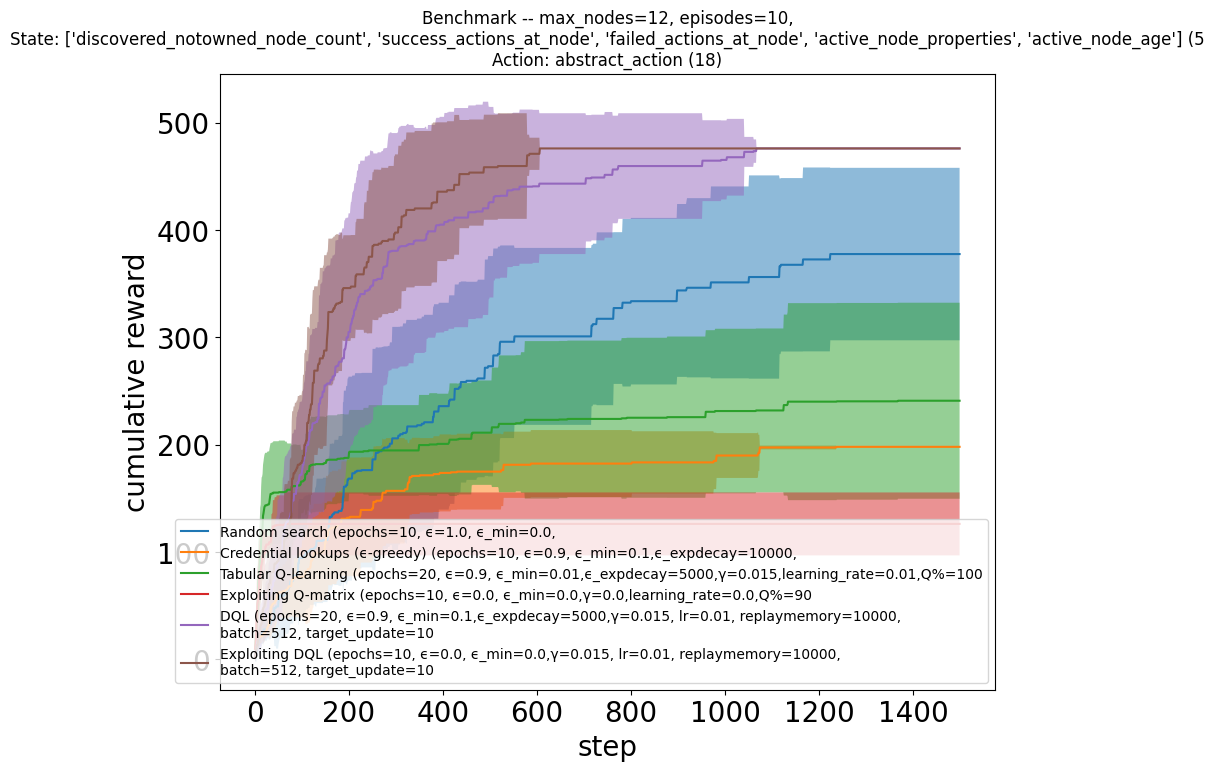

In [17]:
# Compare and plot results for all the agents
all_runs = [
    random_run,
    credlookup_run,
    tabularq_run,
    tabularq_exploit_run,
    dql_run,
    dql_exploit_run
]

# Plot averaged cumulative rewards for DQL vs Random vs DQL-Exploit
themodel = dqla.CyberBattleStateActionModel(ep)
p.plot_averaged_cummulative_rewards(
    all_runs=all_runs,
    title=f'Benchmark -- max_nodes={ep.maximum_node_count}, episodes={eval_episode_count},\n'
    f'State: {[f.name() for f in themodel.state_space.feature_selection]} '
    f'({len(themodel.state_space.feature_selection)}\n'
    f"Action: abstract_action ({themodel.action_space.flat_size()})")

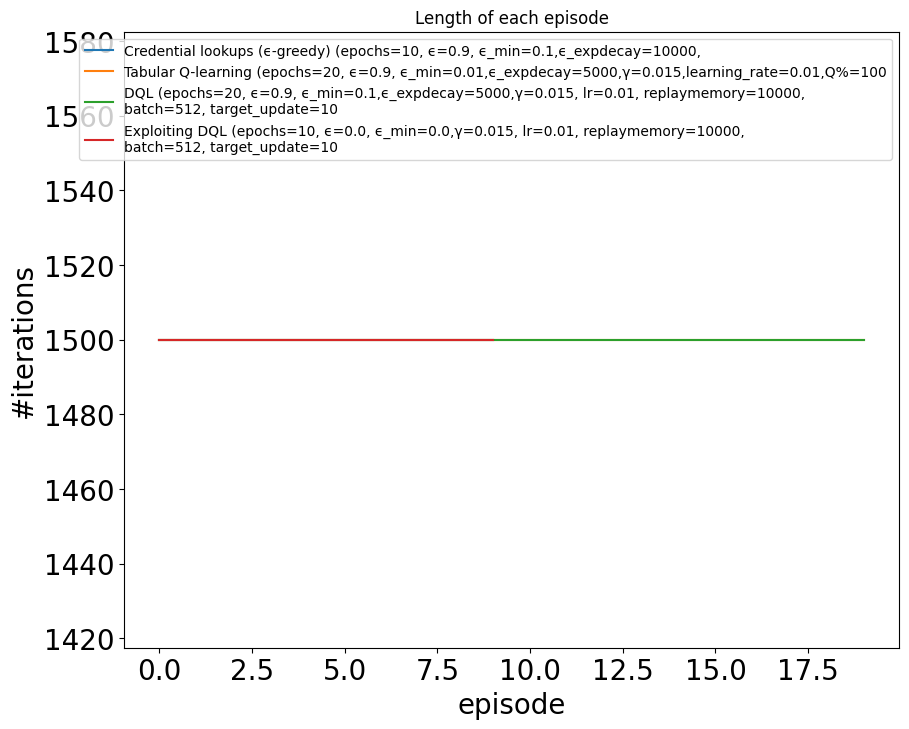

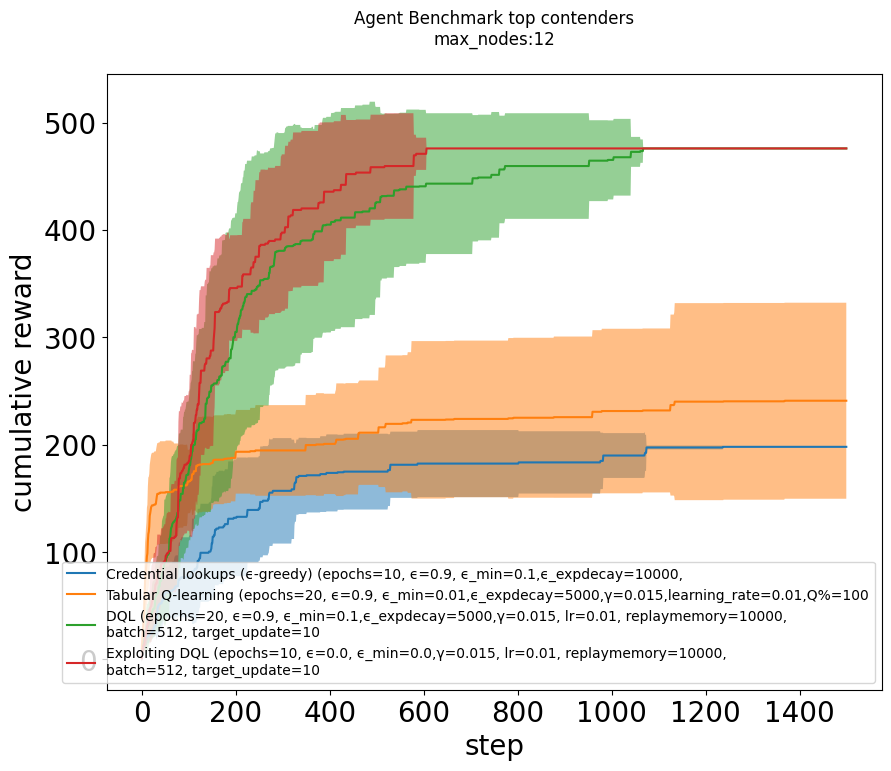

In [18]:
contenders = [
    credlookup_run,
    tabularq_run,
    dql_run,
    dql_exploit_run
]
p.plot_episodes_length(contenders)
p.plot_averaged_cummulative_rewards(
    title=f'Agent Benchmark top contenders\n'
    f'max_nodes:{ep.maximum_node_count}\n',
    all_runs=contenders)

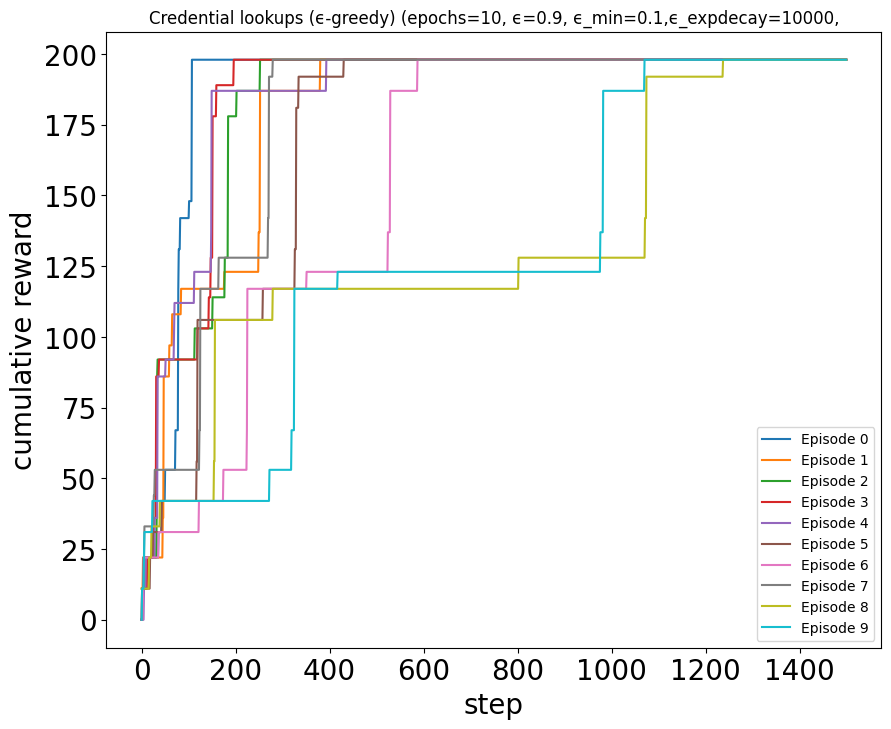

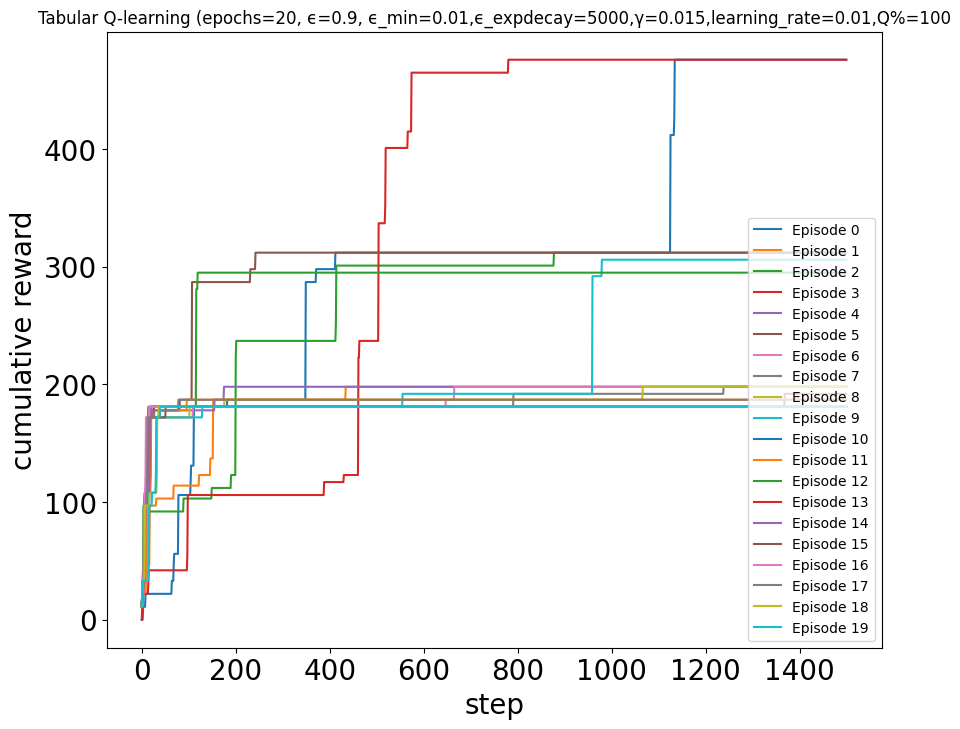

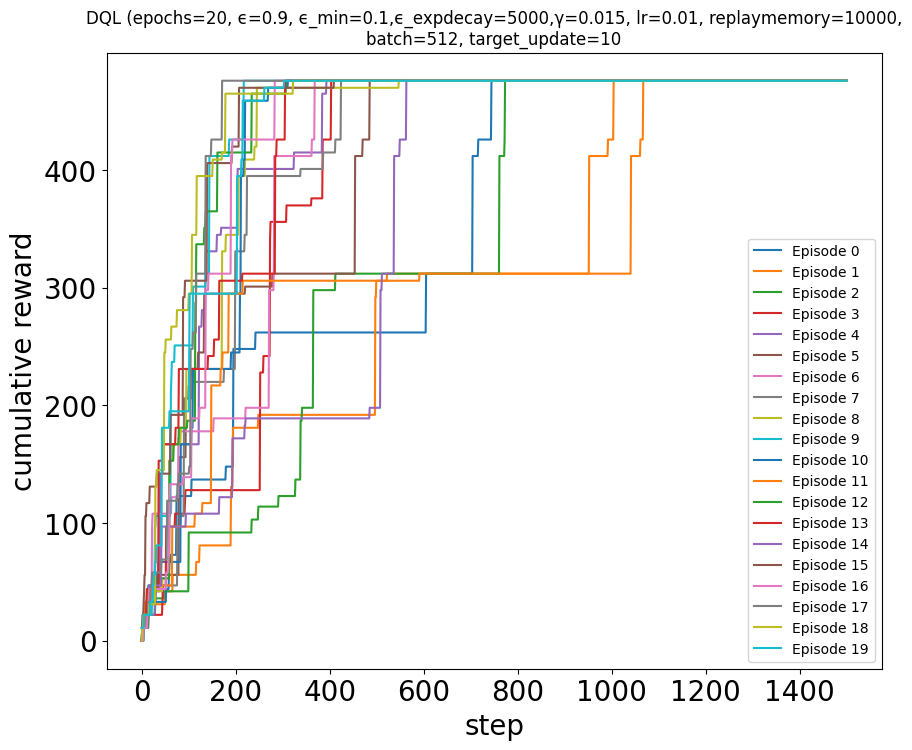

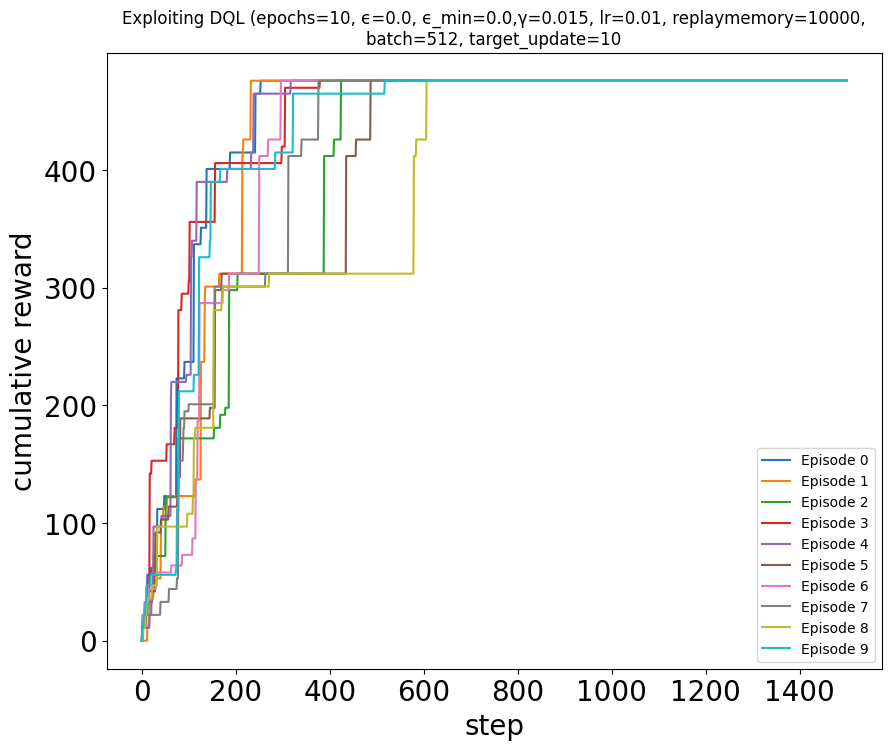

In [19]:
# Plot cumulative rewards for all episodes
for r in contenders:
    p.plot_all_episodes(r)